In [1]:
%config IPCompleter.greedy=True

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
 
from collections import Counter
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [4]:
os.getcwd()

'C:\\Users\\OSCAR\\Documents\\Oscar\\Maestria\\Modelos y aprendizajes\\Prueba Final'

In [5]:
os.chdir('C:\\Users\\OSCAR\\Documents\\Oscar\\Maestria\\Modelos y aprendizajes\\Prueba Final')

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Breast_cancer.csv',
 'Cancer Data set.ipynb',
 'Guion de la prueba final - carne.pdf',
 'Guion prueba final-cáncer de mama.pdf']

## Carga de datos

In [7]:
df = pd.read_csv('Breast_cancer.csv', sep = "~", encoding='latin-1')
df.shape

(569, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df = df.rename(columns={"concave points_mean":"concave_points_mean","concave points_se":"concave_points_se","concave points_worst":"concave_points_worst"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Diagramas de caja (Media)

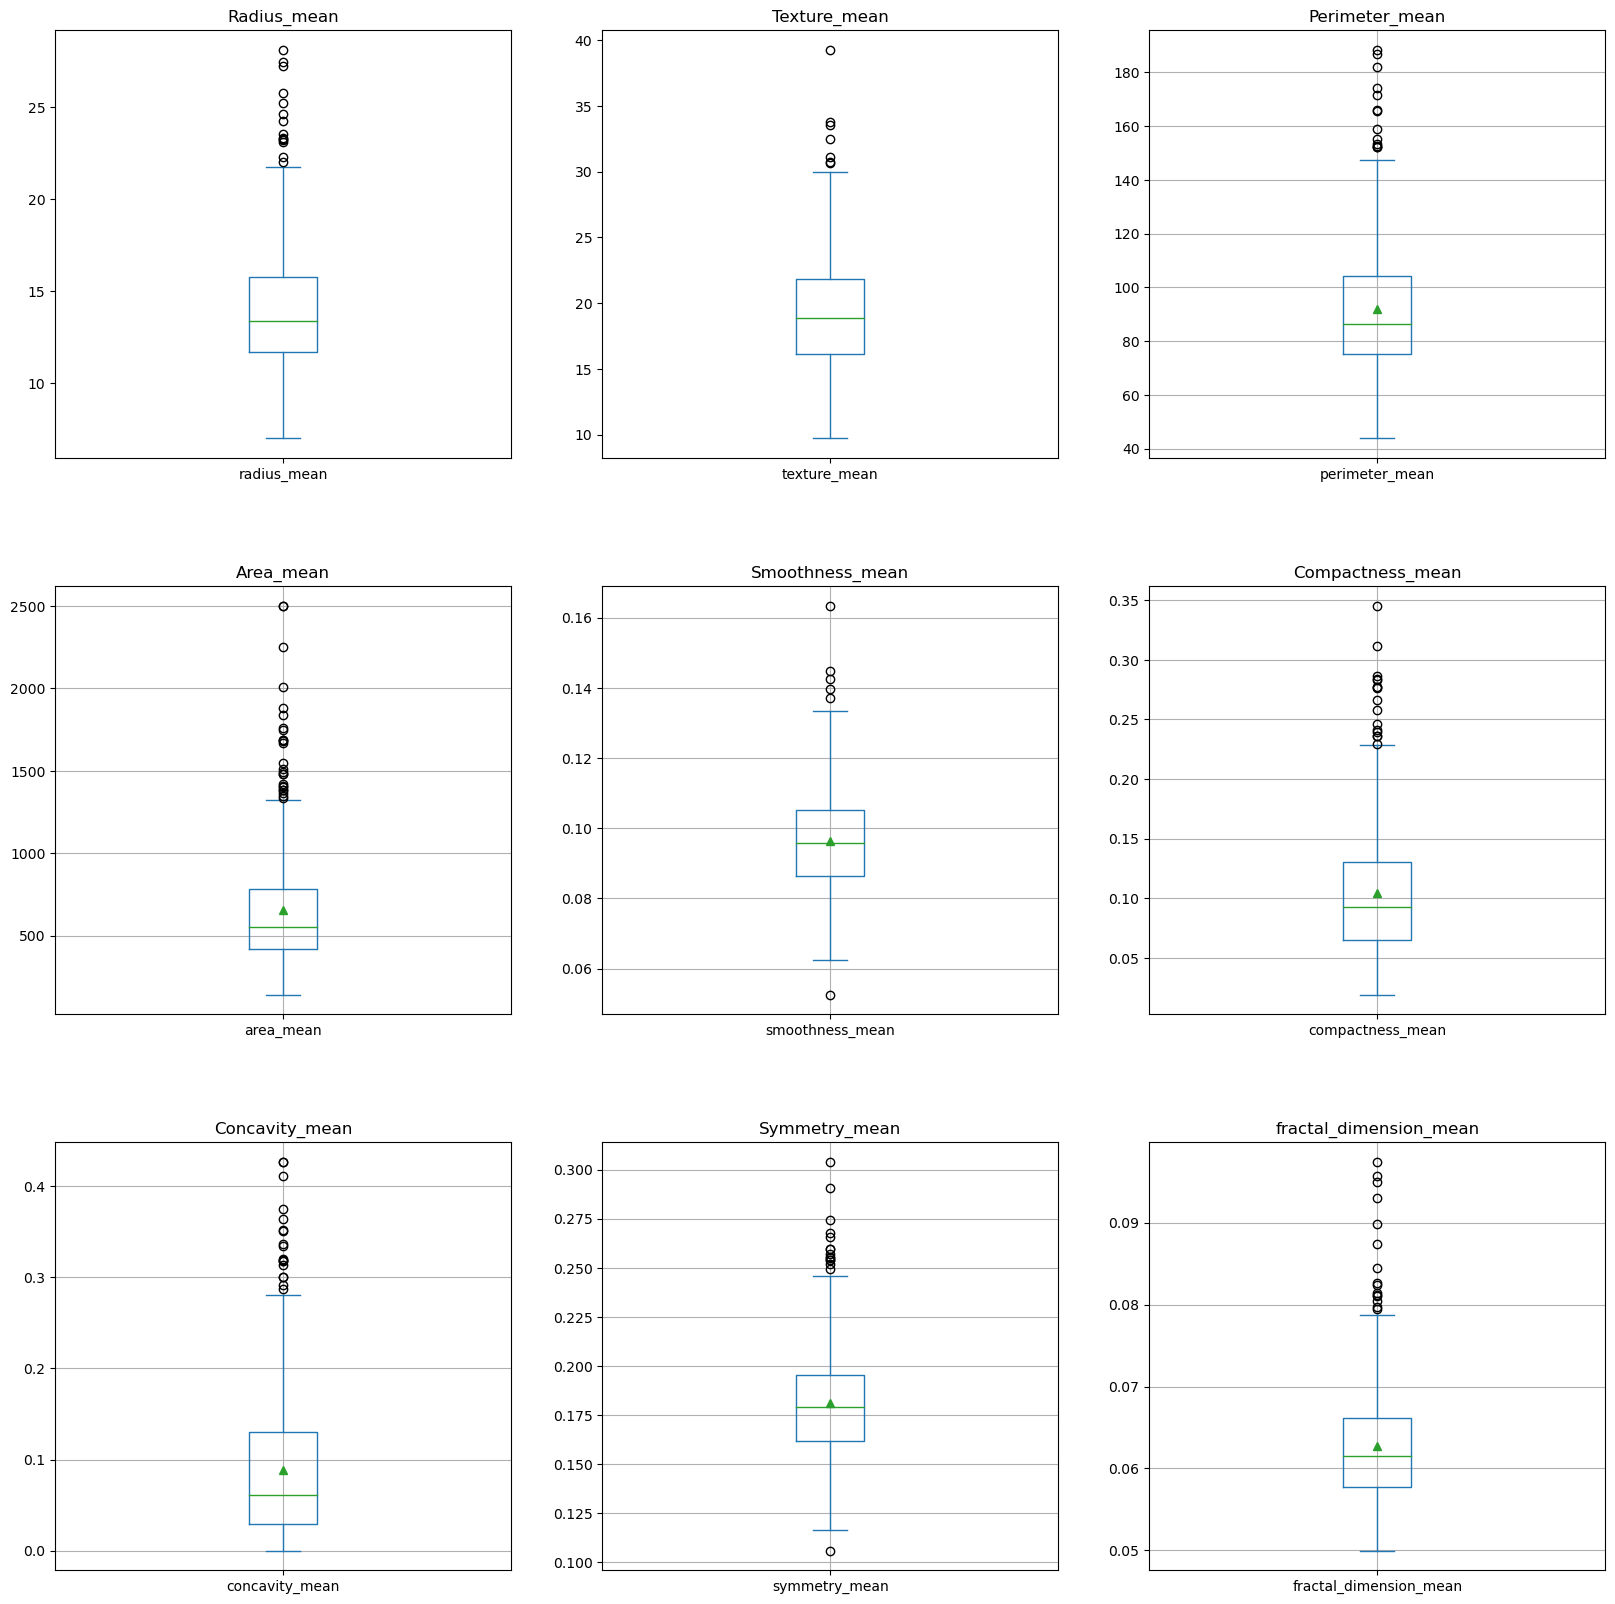

In [11]:
plt.figure(1) 
plt.subplot(331) 
df['radius_mean'].plot.box(figsize=(20,20), title= 'Radius_mean') 
plt.subplot(332) 
df['texture_mean'].plot.box(title= 'Texture_mean') 
plt.subplot(333) 
df['perimeter_mean'].plot.box(title= 'Perimeter_mean', showmeans=True) 
plt.grid(True)
plt.subplot(334) 
df['area_mean'].plot.box(title= 'Area_mean', showmeans=True) 
plt.grid(True)
plt.subplot(335) 
df['smoothness_mean'].plot.box(title= 'Smoothness_mean', showmeans=True) 
plt.grid(True)
plt.subplot(336) 
df['compactness_mean'].plot.box(title= 'Compactness_mean', showmeans=True) 
plt.grid(True)
plt.subplot(337) 
df['concavity_mean'].plot.box(title= 'Concavity_mean', showmeans=True) 
plt.grid(True)
plt.subplot(338) 
df['symmetry_mean'].plot.box(title= 'Symmetry_mean', showmeans=True) 
plt.grid(True)
plt.subplot(339) 
df['fractal_dimension_mean'].plot.box(title= 'fractal_dimension_mean', showmeans=True) 
plt.grid(True)

plt.subplots_adjust(hspace=0.3)

plt.show()

## Diagramas de caja (SE)

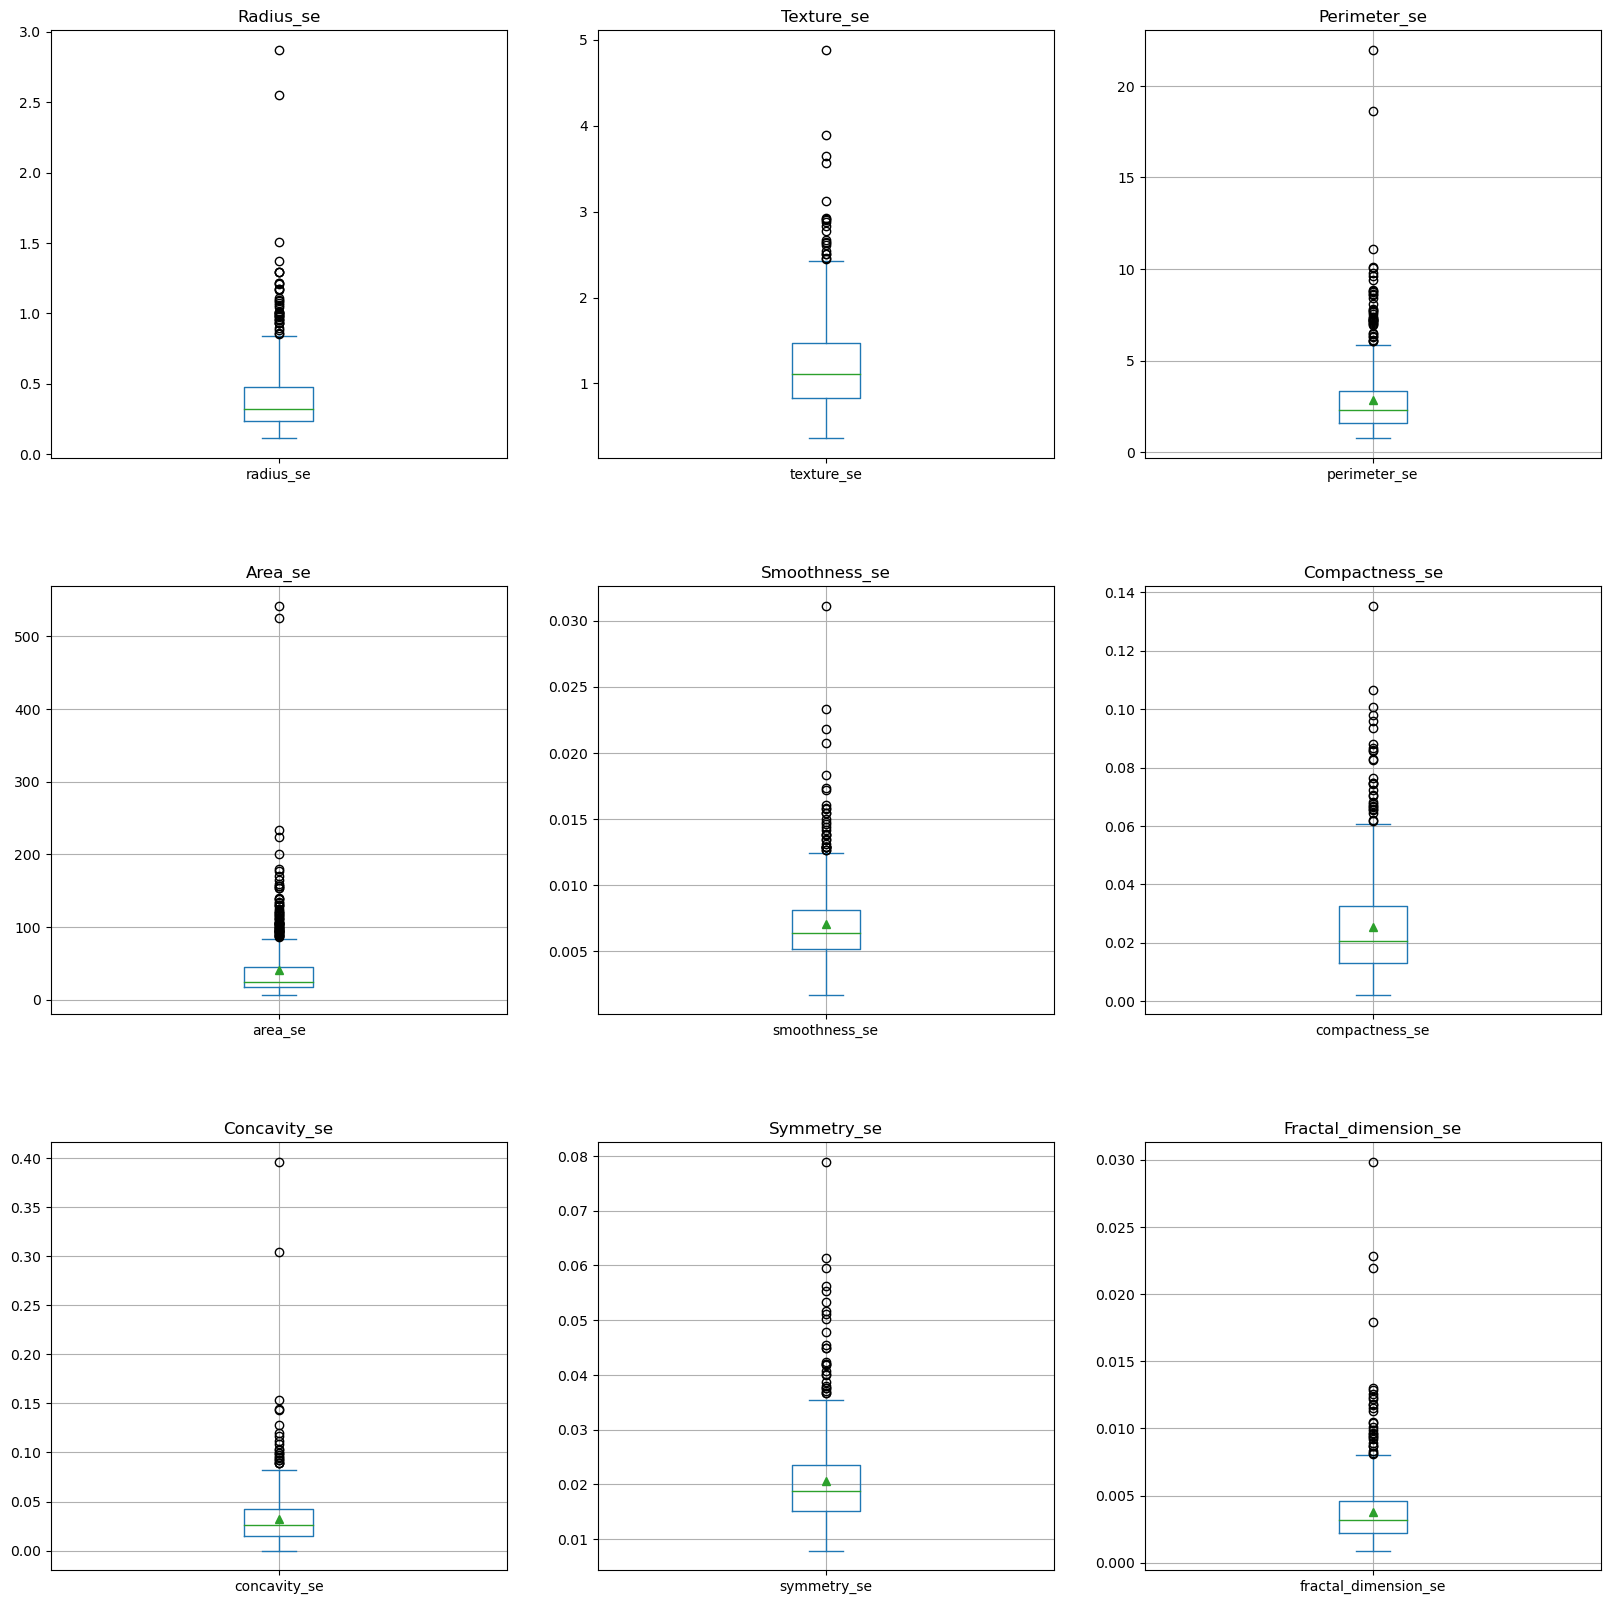

In [12]:
plt.figure(1) 
plt.subplot(331) 
df['radius_se'].plot.box(figsize=(20,20), title= 'Radius_se') 
plt.subplot(332) 
df['texture_se'].plot.box(title= 'Texture_se') 
plt.subplot(333) 
df['perimeter_se'].plot.box(title= 'Perimeter_se', showmeans=True) 
plt.grid(True)
plt.subplot(334) 
df['area_se'].plot.box(title= 'Area_se', showmeans=True) 
plt.grid(True)
plt.subplot(335) 
df['smoothness_se'].plot.box(title= 'Smoothness_se', showmeans=True) 
plt.grid(True)
plt.subplot(336) 
df['compactness_se'].plot.box(title= 'Compactness_se', showmeans=True) 
plt.grid(True)
plt.subplot(337) 
df['concavity_se'].plot.box(title= 'Concavity_se', showmeans=True) 
plt.grid(True)
plt.subplot(338) 
df['symmetry_se'].plot.box(title= 'Symmetry_se', showmeans=True) 
plt.grid(True)
plt.subplot(339) 
df['fractal_dimension_se'].plot.box(title= 'Fractal_dimension_se', showmeans=True) 
plt.grid(True)

plt.subplots_adjust(hspace=0.3)

plt.show()

## Diagramas de caja (Worst)

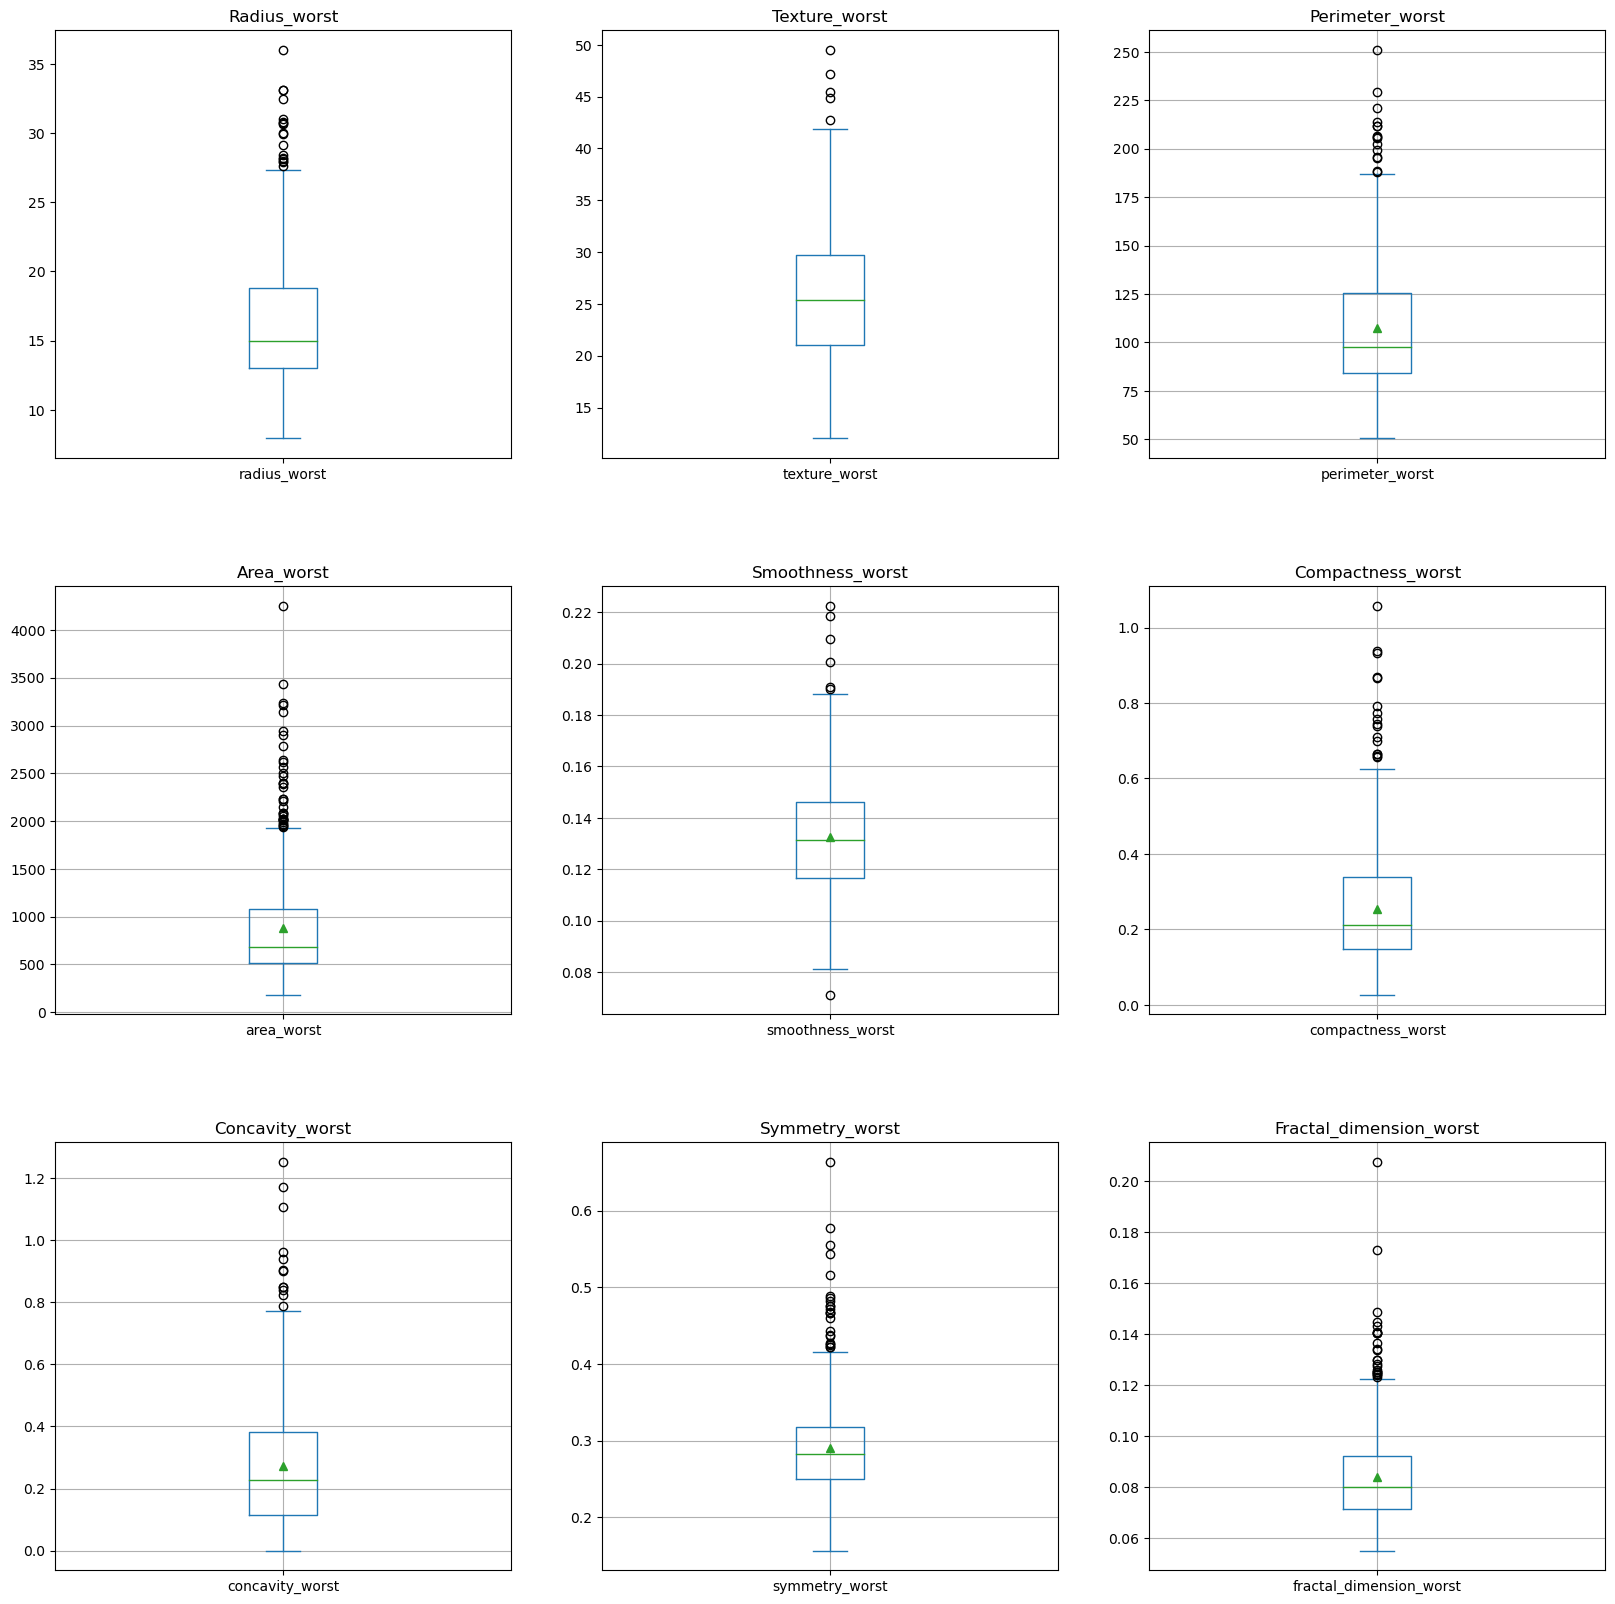

In [13]:
plt.figure(1) 
plt.subplot(331) 
df['radius_worst'].plot.box(figsize=(20,20), title= 'Radius_worst') 
plt.subplot(332) 
df['texture_worst'].plot.box(title= 'Texture_worst') 
plt.subplot(333) 
df['perimeter_worst'].plot.box(title= 'Perimeter_worst', showmeans=True) 
plt.grid(True)
plt.subplot(334) 
df['area_worst'].plot.box(title= 'Area_worst', showmeans=True) 
plt.grid(True)
plt.subplot(335) 
df['smoothness_worst'].plot.box(title= 'Smoothness_worst', showmeans=True) 
plt.grid(True)
plt.subplot(336) 
df['compactness_worst'].plot.box(title= 'Compactness_worst', showmeans=True) 
plt.grid(True)
plt.subplot(337) 
df['concavity_worst'].plot.box(title= 'Concavity_worst', showmeans=True) 
plt.grid(True)
plt.subplot(338) 
df['symmetry_worst'].plot.box(title= 'Symmetry_worst', showmeans=True) 
plt.grid(True)
plt.subplot(339) 
df['fractal_dimension_worst'].plot.box(title= 'Fractal_dimension_worst', showmeans=True) 
plt.grid(True)

plt.subplots_adjust(hspace=0.3)

plt.show()

## Diagnostico

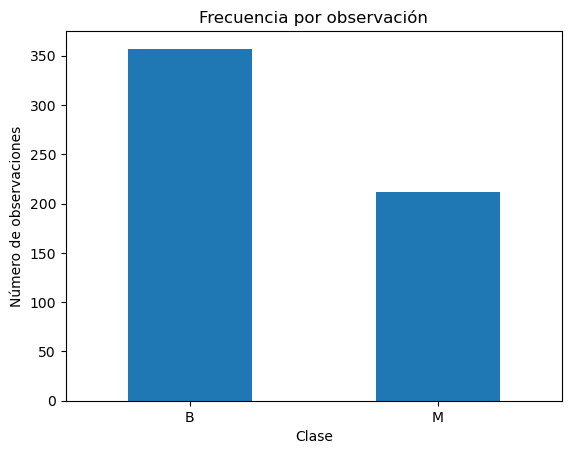

In [14]:
count_classes = pd.value_counts(df['diagnosis'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por observación")
plt.xlabel("Clase")
plt.ylabel("Número de observaciones");

## Chequeo de valores nulos

In [15]:
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
for c in df.columns:
    print(f'{c} {sum(df.isna()[c]) / df.shape[0]} ')

id 0.0 
diagnosis 0.0 
radius_mean 0.0 
texture_mean 0.0 
perimeter_mean 0.0 
area_mean 0.0 
smoothness_mean 0.0 
compactness_mean 0.0 
concavity_mean 0.0 
concave_points_mean 0.0 
symmetry_mean 0.0 
fractal_dimension_mean 0.0 
radius_se 0.0 
texture_se 0.0 
perimeter_se 0.0 
area_se 0.0 
smoothness_se 0.0 
compactness_se 0.0 
concavity_se 0.0 
concave_points_se 0.0 
symmetry_se 0.0 
fractal_dimension_se 0.0 
radius_worst 0.0 
texture_worst 0.0 
perimeter_worst 0.0 
area_worst 0.0 
smoothness_worst 0.0 
compactness_worst 0.0 
concavity_worst 0.0 
concave_points_worst 0.0 
symmetry_worst 0.0 
fractal_dimension_worst 0.0 


In [17]:
df.describe(percentiles = [0.20,.25,0.40,0.50, 0.60, 0.75, 0.80, 0.90, 0.95], exclude = ['object']).T

,count,mean,std,min,20%,25%,40%,50%,60%,75%,80%,90%,95%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,863174.400000,869218.000000,894606.800000,906024.000000,915890.200000,8.813129e+06,9.010708e+06,8.814422e+07,9.042446e+07,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.366000,11.700000,12.726000,13.370000,14.058000,1.578000e+01,1.706800e+01,1.953000e+01,2.057600e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,15.656000,16.170000,17.912000,18.840000,19.968000,2.180000e+01,2.244000e+01,2.499200e+01,2.715000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,73.292000,75.170000,81.938000,86.240000,91.420000,1.041000e+02,1.116800e+02,1.291000e+02,1.358200e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,396.560000,420.300000,496.440000,551.100000,609.740000,7.827000e+02,9.150600e+02,1.177400e+03,1.309800e+03,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.084206,0.086370,0.091828,0.095870,0.099338,1.053000e-01,1.075000e-01,1.148200e-01,1.187800e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.059638,0.064920,0.079530,0.092630,0.108740,1.304000e-01,1.419000e-01,1.754600e-01,2.087000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.024930,0.029560,0.045070,0.061540,0.086212,1.307000e-01,1.497800e-01,2.030400e-01,2.430200e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.017866,0.020310,0.027982,0.033500,0.048318,7.400000e-02,8.425400e-02,1.004200e-01,1.257400e-01,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.158760,0.161900,0.172000,0.179200,0.185480,1.957000e-01,2.005400e-01,2.149400e-01,2.307200e-01,3.040000e-01


## Benigno

In [18]:
df_b = df.loc[(df.diagnosis == 'B'),:]
df_b.shape

(357, 32)

In [19]:
df_b

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


## Malicioso

In [20]:
df_m = df.loc[(df.diagnosis == 'M'),:]
df_m.shape

(212, 32)

In [21]:
df_m

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


## Remplazo de datos

In [22]:
df['diagnosis'] = df['diagnosis'].replace(["B"],["Benigno"])
df['diagnosis'] = df['diagnosis'].replace(["M"],["Malicioso"])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malicioso,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malicioso,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malicioso,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malicioso,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malicioso,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malicioso,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malicioso,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malicioso,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malicioso,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Datos de train y test

In [23]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
y = y.replace(["Benigno"],[0])
y = y.replace(["Malicioso"],[1])
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

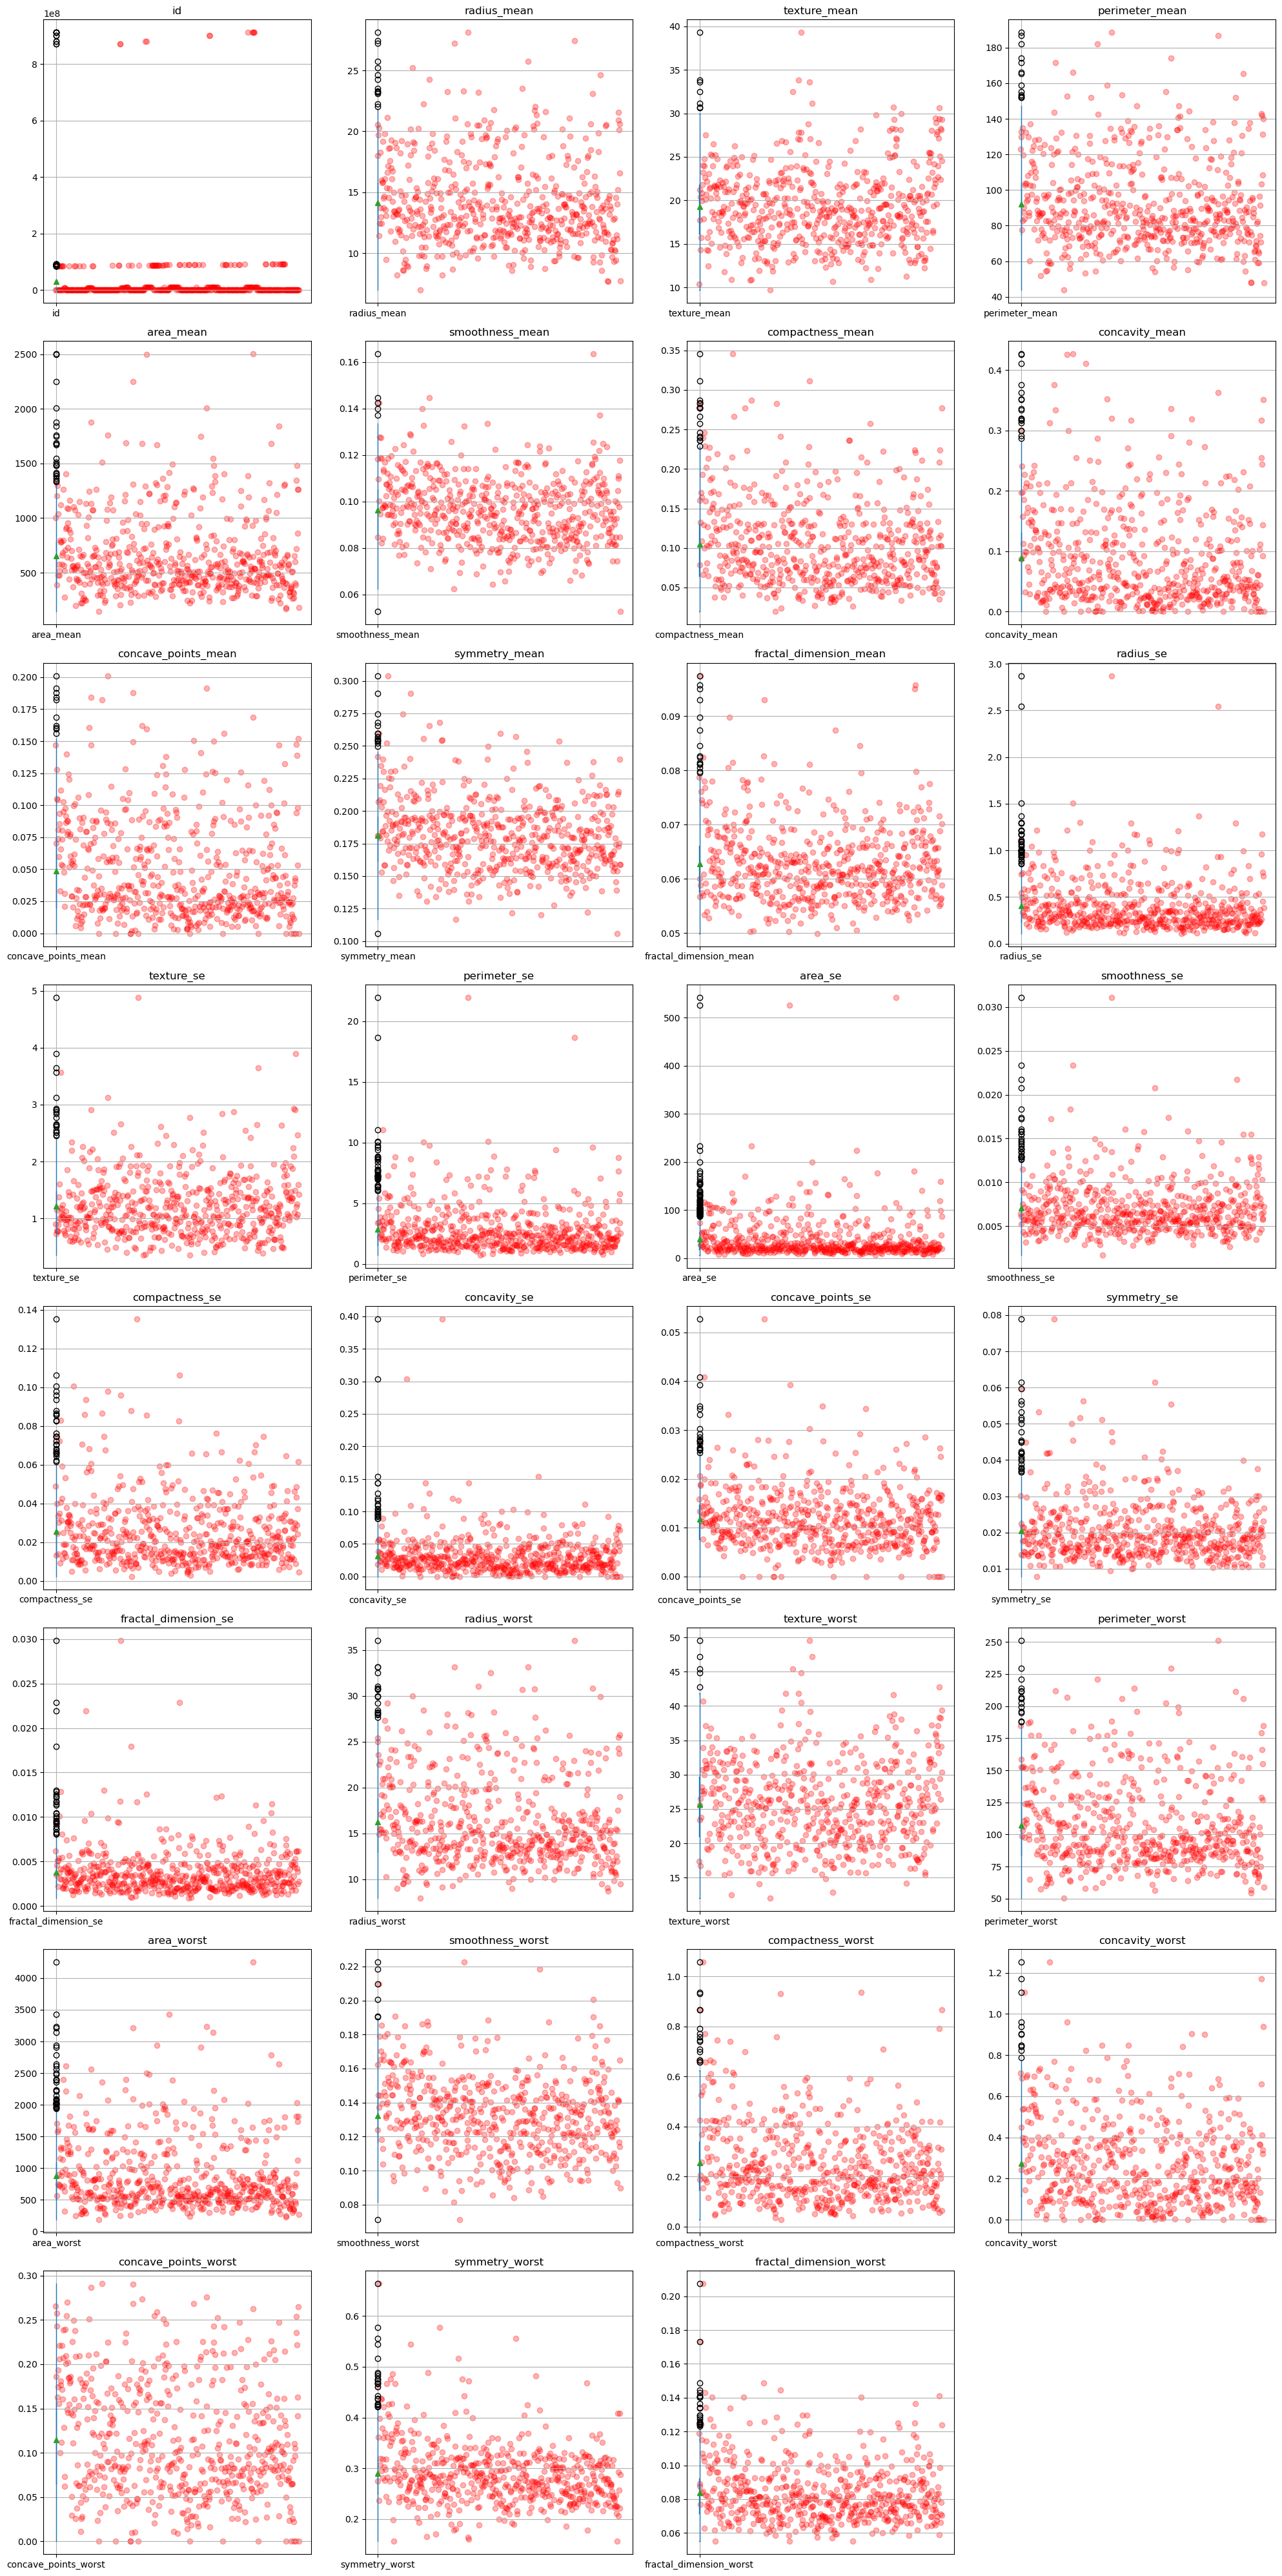

In [25]:
num_features = len(X.columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

plt.figure(figsize=(20, 5 * num_rows))

for i, feature in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    
    X[feature].plot.box(showmeans=True)
    
    plt.scatter(X.index, X[feature], color='red', alpha=0.3)
    
    plt.title(feature)
    
    plt.grid(True)

plt.tight_layout()

plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelizaciones

## 1. Modelo de regresión logística

In [27]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [28]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

## Modelo Test

In [29]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Test:", accuracy)

Accuracy Test: 0.6228070175438597


In [30]:
y_predt = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predt)
print("Accuracy Train:", accuracy)

Accuracy Train: 0.6285714285714286


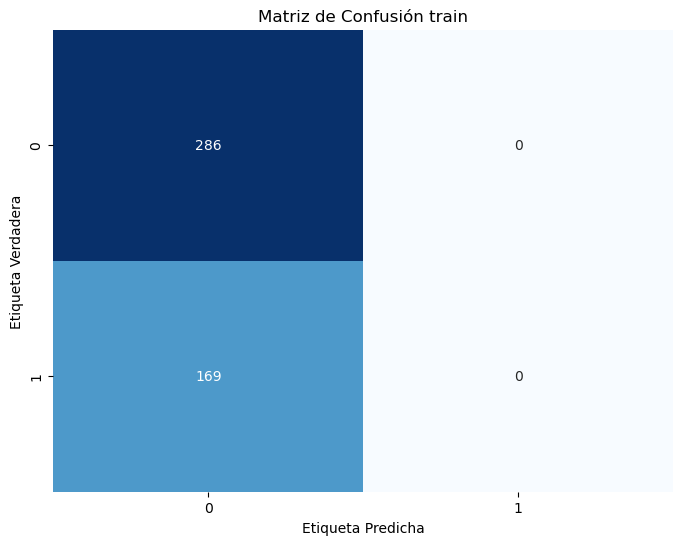

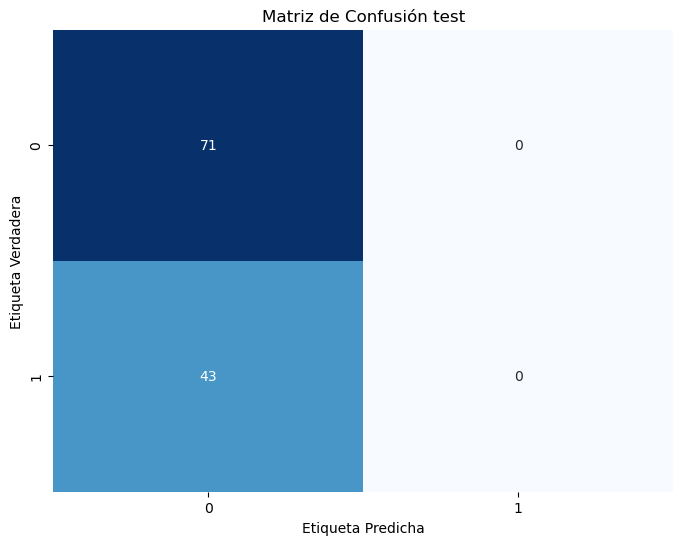

In [31]:
conf_matrix1 = confusion_matrix(y_train, y_predt)
conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión train')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión test')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## Modelo con normalizacion de variables

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after normalization test:", accuracy)

Accuracy after normalization test: 0.9736842105263158


In [34]:
y_predt = model.predict(X_train_scaled)

# Evaluate the model
accuracy = accuracy_score(y_train, y_predt)
print("Accuracy after normalization train:", accuracy)

Accuracy after normalization train: 0.9868131868131869


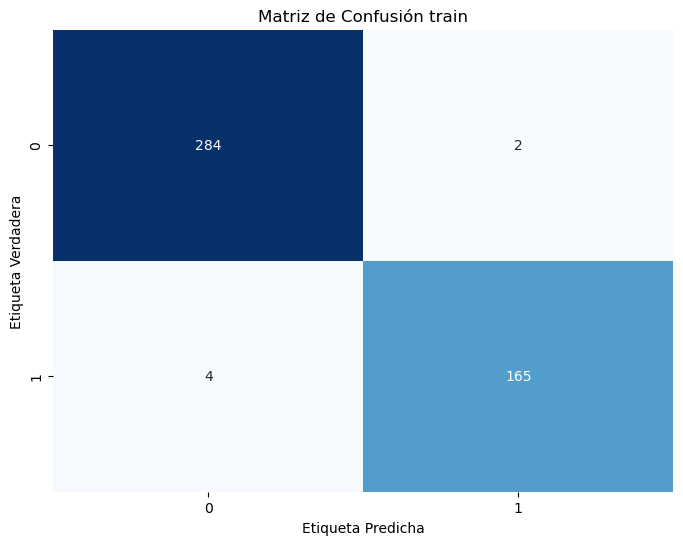

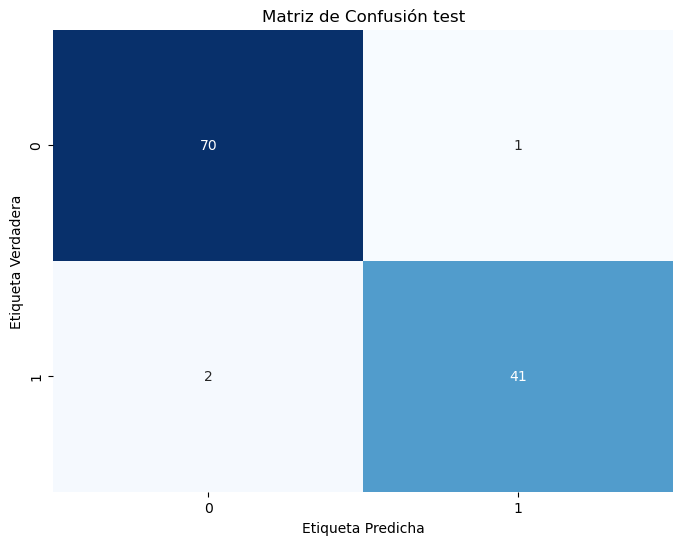

In [35]:
conf_matrix1 = confusion_matrix(y_train, y_predt)
conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión train')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión test')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## 2. Modelo Xgboost

In [36]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)

Accuracy test: 0.956140350877193


In [37]:
y_predt = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predt)
print("Accuracy Train:", accuracy)

Accuracy Train: 1.0


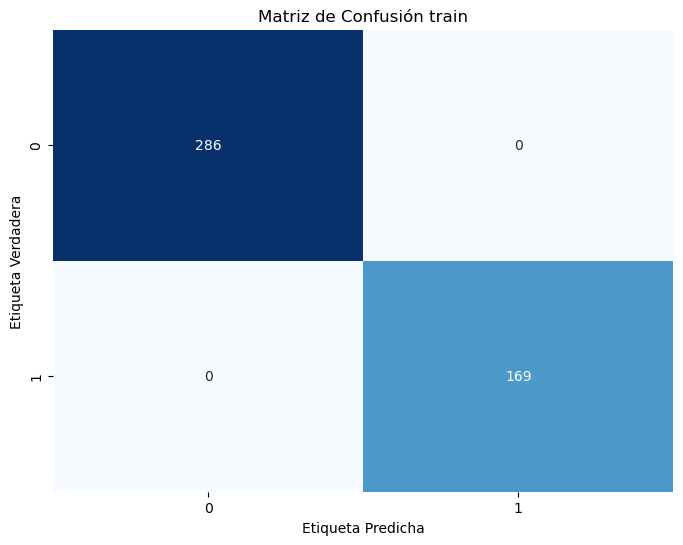

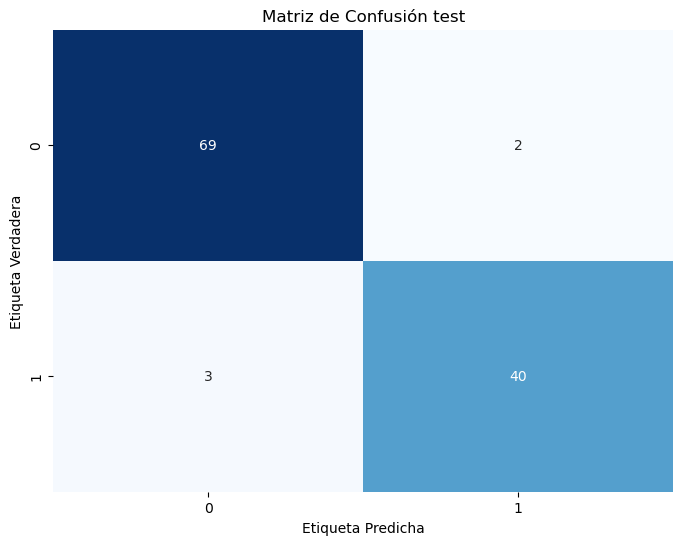

In [38]:
conf_matrix1 = confusion_matrix(y_train, y_predt)
conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión train')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión test')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## 3. Random forest classifier

In [39]:
rf_classifier = RandomForestClassifier(n_estimators= 8, max_depth= 4)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)

Accuracy test: 0.956140350877193


In [40]:
y_predt = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predt)
print("Accuracy Train:", accuracy)

Accuracy Train: 1.0


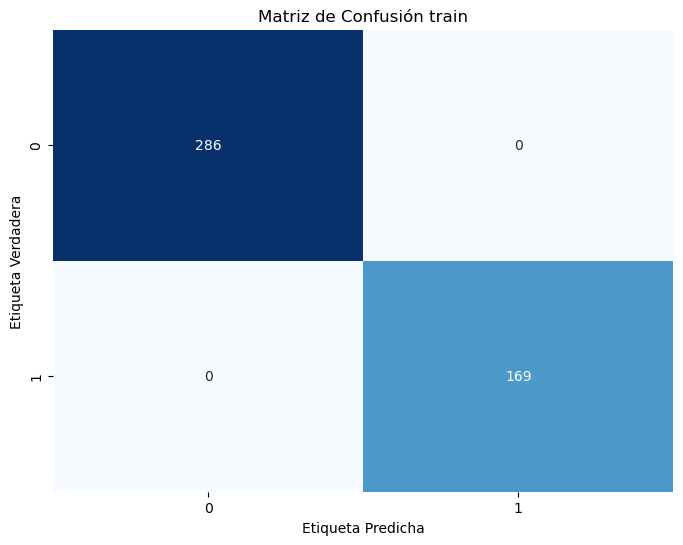

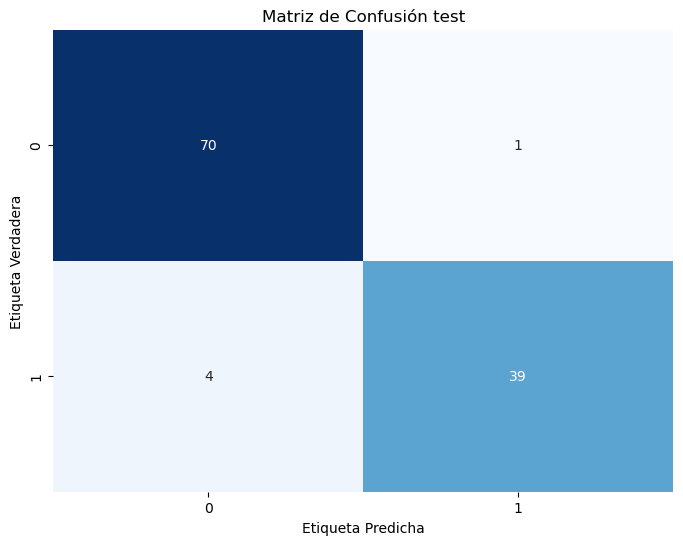

In [41]:
conf_matrix1 = confusion_matrix(y_train, y_predt)
conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión train')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión test')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Modelo Final

## Creacion de un data set balanceado y Modelización

In [42]:
pipeline = Pipeline([
    ('under', RandomUnderSampler()),  
    ('over', SMOTE()),                
    ('model', LogisticRegression())  
])


pipeline.fit(X_train_scaled, y_train)

y_pred = pipeline.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after normalization test and tec:", accuracy)

Accuracy after normalization test and tec: 0.9824561403508771


In [43]:
y_predt = pipeline.predict(X_train_scaled)

# Evaluate the model
accuracy = accuracy_score(y_train, y_predt)
print("Accuracy after normalization train and tec:", accuracy)

Accuracy after normalization train and tec: 0.9868131868131869


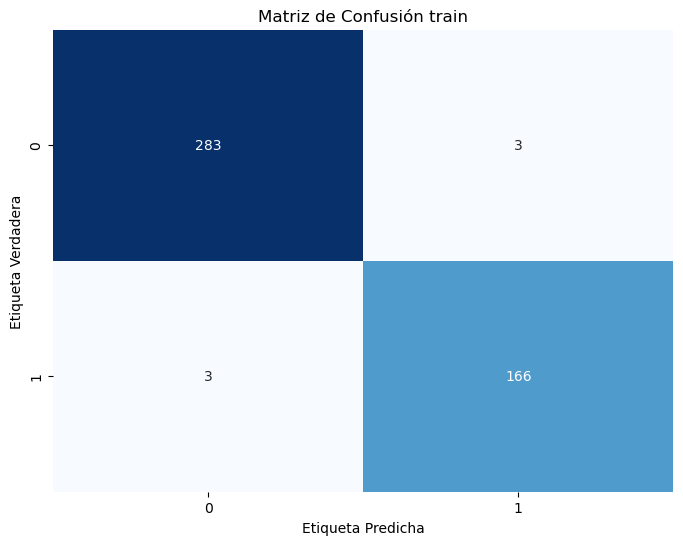

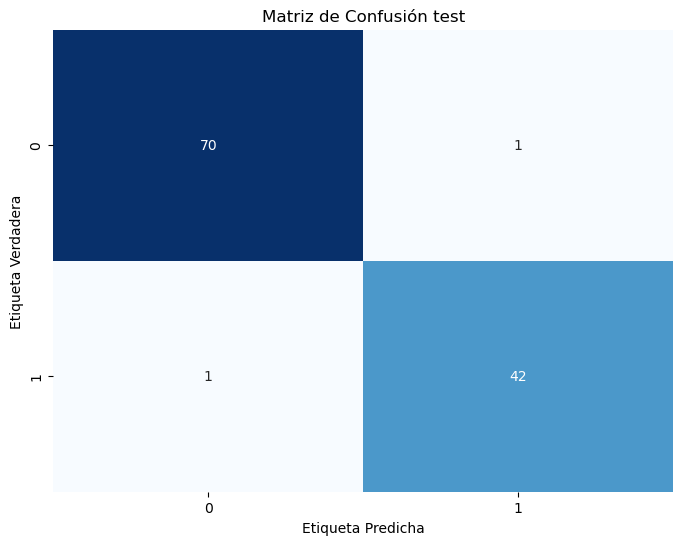

In [44]:
conf_matrix1 = confusion_matrix(y_train, y_predt)
conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión train')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión test')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()